In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel


In [52]:
# Load dataset
file_path = "/content/Onion_Details_data_set.csv"

In [53]:
df = pd.read_csv(file_path)

In [54]:
df

,Year,Area,Season,Production,Extent,Air Temp(Mean),Relative Humidity-D,Relative Humidity-N,Rainfall
0,1997,Anuradhapura,Maha,67.0,25.0,27.88,69.50,94.00,130.23
1,1997,Trincomalee,Yala,71.0,8.0,NaN,62.75,NaN,92.80
2,1997,Anuradhapura,Yala,3212.0,538.0,29.67,65.00,89.00,43.95
3,1998,Anuradhapura,Maha,90.0,28.0,27.88,79.00,95.00,203.15
4,1998,Trincomalee,Yala,9.0,2.0,NaN,63.75,NaN,42.20
...,...,...,...,...,...,...,...,...,...
292,2021,Kururnegala,Yala,607.0,26.0,28.15,74.25,87.75,216.85
293,2021,Anuradhapura,Yala,3.0,1620.0,29.03,68.50,89.00,67.98
294,2021,Polonnaruwa,Yala,27506.0,115.0,30.38,59.50,NaN,40.65
295,2021,Badulla,Yala,1701.0,NaN,25.55,71.00,NaN,148.03


In [55]:
# Initial Observations
print("Dataset Info:\n", df.info())
print("\nFirst 5 rows:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 297 non-null    int64  
 1   Area                 297 non-null    object 
 2   Season               297 non-null    object 
 3   Production           296 non-null    float64
 4   Extent               285 non-null    float64
 5   Air Temp(Mean)       290 non-null    float64
 6   Relative Humidity-D  296 non-null    float64
 7   Relative Humidity-N  214 non-null    float64
 8   Rainfall             288 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 21.0+ KB
Dataset Info:
 None

First 5 rows:
    Year          Area Season  Production  Extent  Air Temp(Mean)  \
0  1997  Anuradhapura   Maha        67.0    25.0           27.88   
1  1997   Trincomalee   Yala        71.0     8.0             NaN   
2  1997  Anuradhapura   Yala      3212.0   

In [56]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Year                    0
Area                    0
Season                  0
Production              1
Extent                 12
Air Temp(Mean)          7
Relative Humidity-D     1
Relative Humidity-N    83
Rainfall                9
dtype: int64


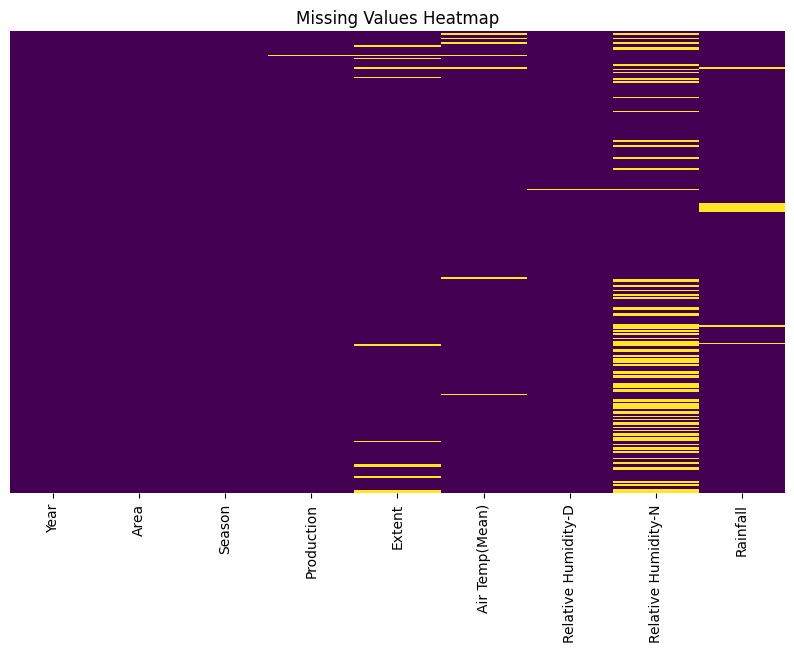

In [57]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [58]:
# Summary statistics
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
               Year    Production       Extent  Air Temp(Mean)  \
count   297.000000    296.000000   285.000000      290.000000   
mean   2012.693603   1335.178727   109.621053       27.568552   
std       5.756054   4000.708186   284.075564        2.389231   
min    1997.000000      1.000000     1.000000       15.450000   
25%    2009.000000     14.000000     2.000000       26.785000   
50%    2014.000000     90.000000    12.000000       27.500000   
75%    2017.000000    359.500000    45.000000       29.200000   
max    2021.000000  27506.000000  1921.000000       31.330000   

       Relative Humidity-D  Relative Humidity-N    Rainfall  
count           296.000000           214.000000  288.000000  
mean             73.536318            88.670748  147.449444  
std               6.181758             4.498544  113.191062  
min              52.500000            72.330000    0.000000  
25%              69.750000            86.250000   53.817500  
50%              75

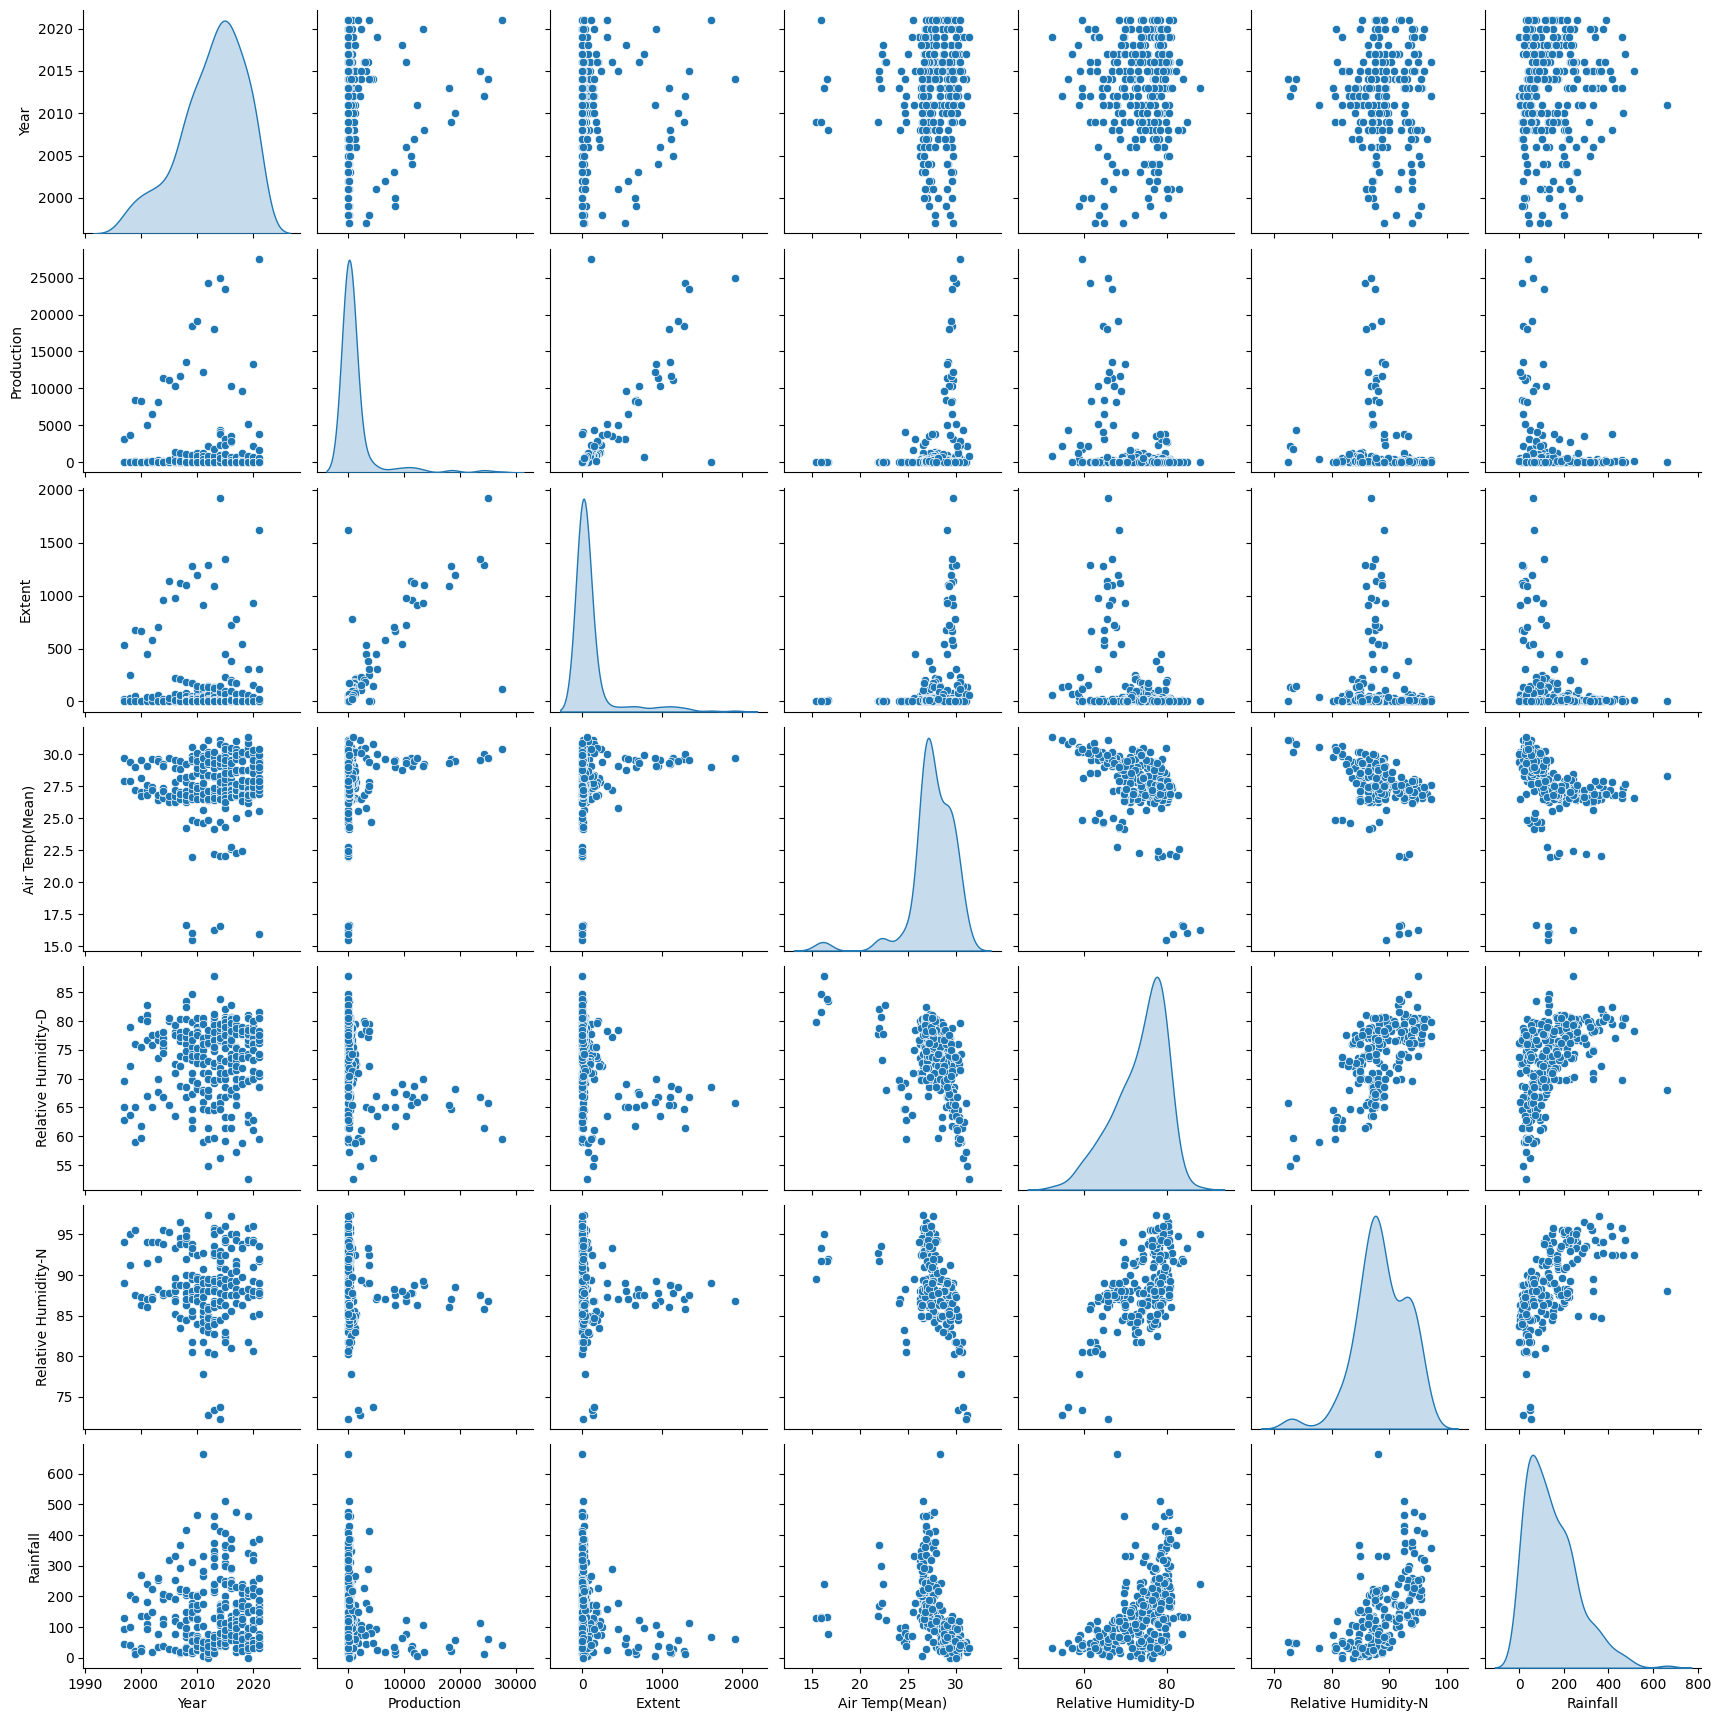

In [59]:
# Pairplot for visualizing relationships between variables
sns.pairplot(df, diag_kind='kde')
plt.show()

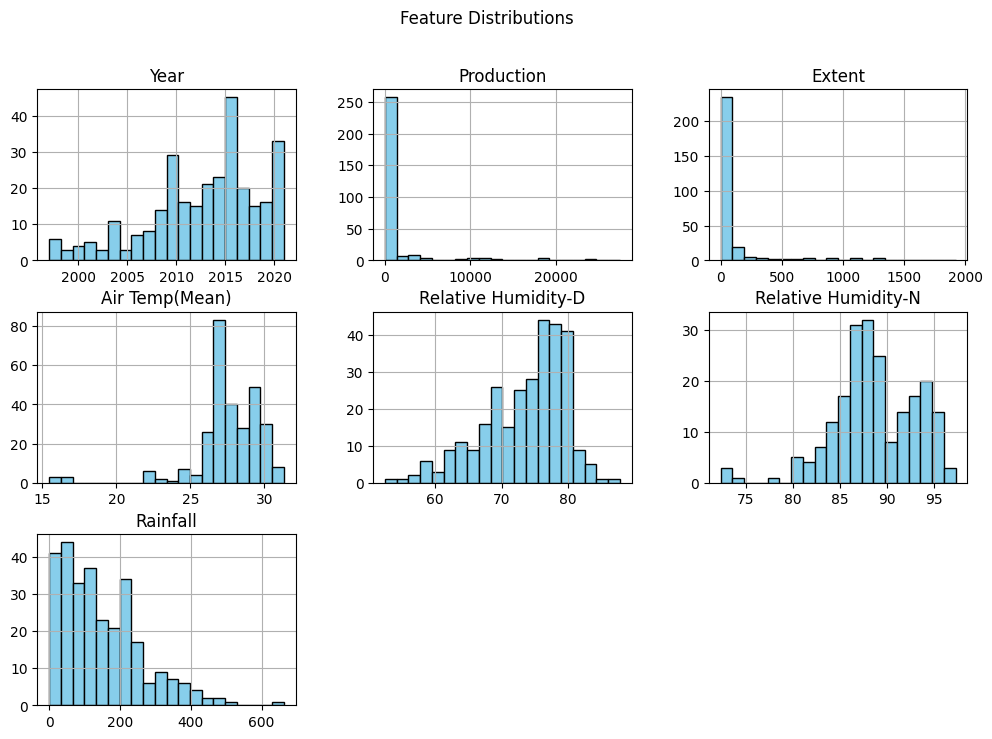

In [60]:
# Histograms of numerical variables
df.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

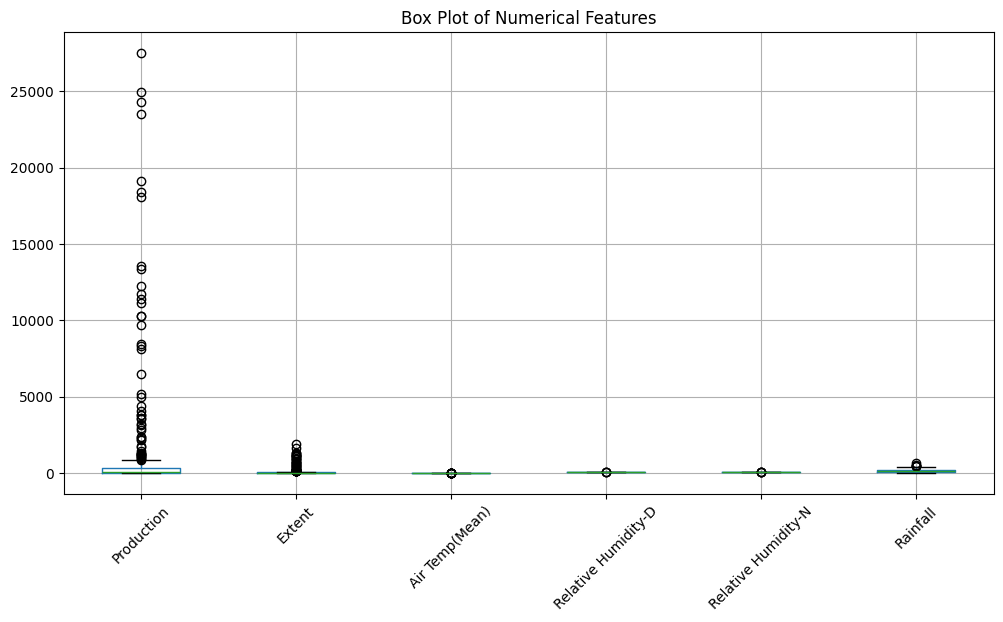

In [61]:
# Box plots to check for outliers
plt.figure(figsize=(12, 6))
df.boxplot(column=['Production', 'Extent', 'Air Temp(Mean)', 'Relative Humidity-D', 'Relative Humidity-N', 'Rainfall'])
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()

<ipython-input-62-deb2a631a2e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Area"], order=df["Area"].value_counts().index, palette="viridis")


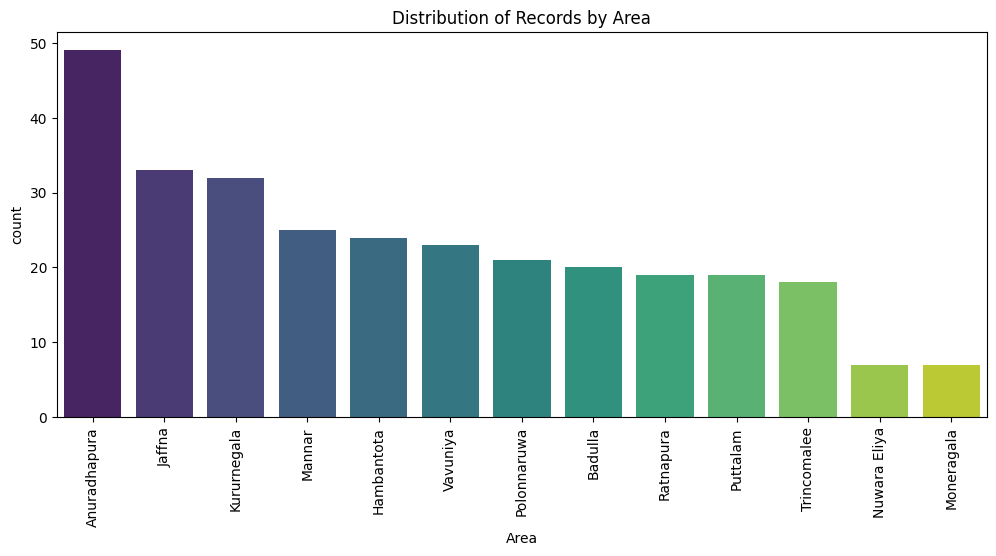

In [62]:
# Distribution of categorical variables
plt.figure(figsize=(12, 5))
sns.countplot(x=df["Area"], order=df["Area"].value_counts().index, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribution of Records by Area")
plt.show()

<ipython-input-63-7f88700d4ef5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Season"], palette="coolwarm")


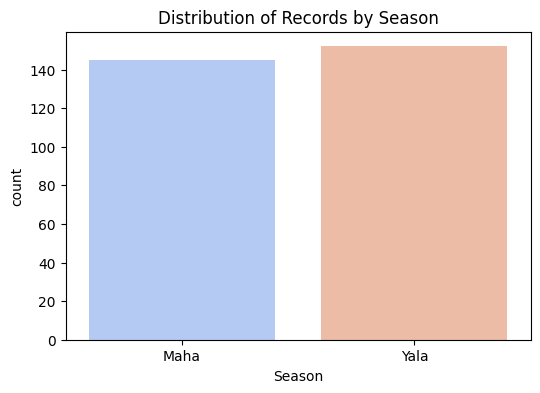

In [63]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Season"], palette="coolwarm")
plt.title("Distribution of Records by Season")
plt.show()


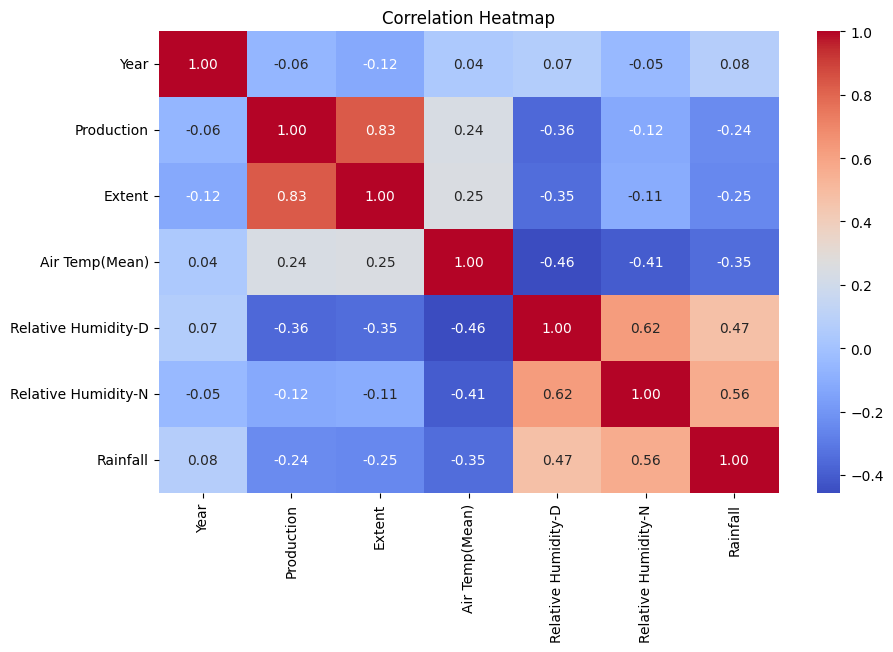

In [64]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [65]:
# calculating and visualizing correlation of each feature with the target value
corr_matrix = df.corr (numeric_only=True)
corr_with_target = corr_matrix['Production'].sort_values(ascending=False)
print(corr_with_target)

Production             1.000000
Extent                 0.834010
Air Temp(Mean)         0.238502
Year                  -0.064008
Relative Humidity-N   -0.119595
Rainfall              -0.237141
Relative Humidity-D   -0.362093
Name: Production, dtype: float64


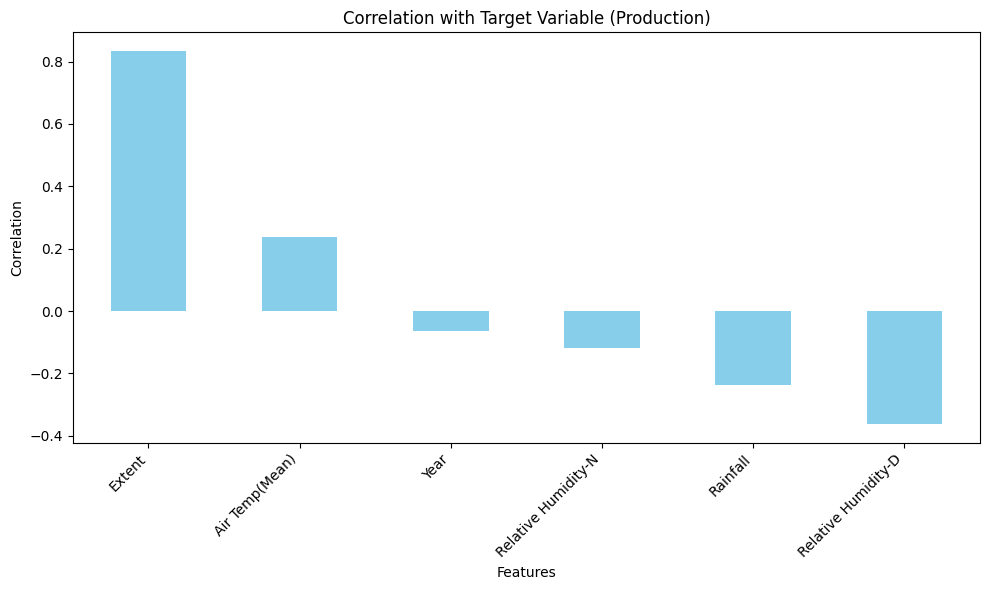

In [66]:
plt.figure(figsize=(10, 6))
corr_with_target.drop('Production').plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable (Production)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [67]:
# Drop rows with missing target variable
df.dropna(subset=['Production'], inplace=True)

In [68]:
# Handle missing values with median imputation
for col in ['Extent', 'Air Temp(Mean)', 'Relative Humidity-D', 'Rainfall']:
    df[col].fillna(df[col].median(), inplace=True)


<ipython-input-68-b21b83e861a7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [69]:
df['Relative Humidity-N'].fillna(
    df['Relative Humidity-D'] * (df['Relative Humidity-N'].mean() / df['Relative Humidity-D'].mean()), inplace=True)


<ipython-input-69-5e1447a6044e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Relative Humidity-N'].fillna(


In [70]:
# One-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=['Area', 'Season'], drop_first=False)

In [71]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 296
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 296 non-null    int64  
 1   Production           296 non-null    float64
 2   Extent               296 non-null    float64
 3   Air Temp(Mean)       296 non-null    float64
 4   Relative Humidity-D  296 non-null    float64
 5   Relative Humidity-N  296 non-null    float64
 6   Rainfall             296 non-null    float64
 7   Area_Anuradhapura    296 non-null    bool   
 8   Area_Badulla         296 non-null    bool   
 9   Area_Hambantota      296 non-null    bool   
 10  Area_Jaffna          296 non-null    bool   
 11  Area_Kururnegala     296 non-null    bool   
 12  Area_Mannar          296 non-null    bool   
 13  Area_Moneragala      296 non-null    bool   
 14  Area_Nuwara Eliya    296 non-null    bool   
 15  Area_Polonnaruwa     296 non-null    bool   


In [72]:
df_encoded.isnull().sum()

,0
Year,0
Production,0
Extent,0
Air Temp(Mean),0
Relative Humidity-D,0
Relative Humidity-N,0
Rainfall,0
Area_Anuradhapura,0
Area_Badulla,0
Area_Hambantota,0


In [73]:
# Define features and target
X = df_encoded.drop(columns=['Production'])
y = df_encoded['Production']

In [74]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [76]:
# Save the column names used for training (after encoding and scaling)
columns_used = X.columns.tolist()  # These are the original columns used after encoding
joblib.dump(columns_used, 'train_columns.pkl')

print("Scaler and columns used during training saved.")

Scaler and columns used during training saved.


In [77]:
# Model dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [78]:
# Function to train, evaluate, and save models
def evaluate_and_save_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test R² (%)': r2_score(y_test, y_test_pred) * 100
    }

    print(f"{model_name} Performance:")
    print(metrics)

    # Save model
    joblib.dump(model, f"{model_name.replace(' ', '_')}.pkl")
    print(f"{model_name} saved as {model_name.replace(' ', '_')}.pkl\n")

    return metrics

In [79]:
# Evaluate and save all models
results = {name: evaluate_and_save_model(model, name, X_train_scaled, X_test_scaled, y_train, y_test) for name, model in models.items()}
results_df = pd.DataFrame(results).T
print(results_df)

Linear Regression Performance:
{'Test MAE': 846.3197394812777, 'Test RMSE': 1815.746803080928, 'Test R² (%)': 84.79108440887906}
Linear Regression saved as Linear_Regression.pkl

Decision Tree Performance:
{'Test MAE': 1188.9283699666669, 'Test RMSE': 3704.0370352338523, 'Test R² (%)': 36.709530996073106}
Decision Tree saved as Decision_Tree.pkl

Random Forest Performance:
{'Test MAE': 821.3837412130001, 'Test RMSE': 2173.785304561285, 'Test R² (%)': 78.20178307535623}
Random Forest saved as Random_Forest.pkl

Gradient Boosting Performance:
{'Test MAE': 887.8507820524129, 'Test RMSE': 2417.966507384967, 'Test R² (%)': 73.02954737054385}
Gradient Boosting saved as Gradient_Boosting.pkl

                      Test MAE    Test RMSE  Test R² (%)
Linear Regression   846.319739  1815.746803    84.791084
Decision Tree      1188.928370  3704.037035    36.709531
Random Forest       821.383741  2173.785305    78.201783
Gradient Boosting   887.850782  2417.966507    73.029547


In [80]:
# # Function to train and evaluate models
# def evaluate_model(model, X_train, X_test, y_train, y_test):
#     model.fit(X_train, y_train)
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)
#     return {
#         # 'Train MAE': mean_absolute_error(y_train, y_train_pred),
#         'Test MAE': mean_absolute_error(y_test, y_test_pred),
#         # 'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
#         'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
#         # 'Train R²': r2_score(y_train, y_train_pred),
#         'Test R² (%)': r2_score(y_test, y_test_pred) * 100
#     }

In [81]:
# # Evaluate all models
# results = {name: evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test) for name, model in models.items()}
# results_df = pd.DataFrame(results).T
# print(results_df)

In [82]:
# # Hyperparameter tuning for Random Forest
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

In [83]:
# grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)
# print("Best RF Parameters:", grid_search.best_params_)

# # Feature Importance (Random Forest)
# rf_best = grid_search.best_estimator_
# feature_importances = pd.Series(rf_best.feature_importances_, index=X.columns)
# plt.figure(figsize=(12, 6))
# feature_importances.sort_values(ascending=False).plot(kind='bar', color='teal')
# plt.title("Feature Importance (Random Forest)")
# plt.show()

In [84]:
# Feature Selection using Random Forest
rf_temp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_temp.fit(X_train_scaled, y_train)
selector = SelectFromModel(rf_temp, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

Selected Features: ['Extent', 'Air Temp(Mean)', 'Relative Humidity-N']


In [85]:
# # Hyperparameter tuning for Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search_rf.fit(X_train_scaled, y_train)
# print("Best RF Parameters:", grid_search_rf.best_params_)
# rf_best = grid_search_rf.best_estimator_

In [86]:
# Further Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train_selected, y_train)
print("Best RF Parameters:", grid_search_rf.best_params_)
rf_best = grid_search_rf.best_estimator_


Best RF Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [87]:
# Train and evaluate the best-tuned Random Forest model
y_test_pred_rf = rf_best.predict(X_test_selected)

In [88]:
# Train and evaluate Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_test_pred_lr = lr_model.predict(X_test_scaled)

In [89]:
# # Compare final performance
# rf_results = {
#     'Test MAE': mean_absolute_error(y_test, y_test_pred_rf),
#     'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_rf)),
#     'Test R² (%)': r2_score(y_test, y_test_pred_rf) * 100
# }

# print("Final Tuned Random Forest Performance:")
# print(rf_results)


In [90]:
# Save the best model after further tuning
joblib.dump(rf_best, "final_rf_model.pkl")
print("Best tuned Random Forest model saved as final_rf_model.pkl")

Best tuned Random Forest model saved as final_rf_model.pkl


In [91]:
# Train and evaluate the best-tuned Random Forest model
# y_test_pred_rf = rf_best.predict(X_test_scaled)

In [92]:
# Compare final performance
results = {
    'Linear Regression': {
        'Test MAE': mean_absolute_error(y_test, y_test_pred_lr),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_lr)),
        'Test R² (%)': r2_score(y_test, y_test_pred_lr) * 100
    },
    'Tuned Random Forest': {
        'Test MAE': mean_absolute_error(y_test, y_test_pred_rf),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_rf)),
        'Test R² (%)': r2_score(y_test, y_test_pred_rf) * 100
    }
}
results_df = pd.DataFrame(results).T
print(results_df)

                       Test MAE    Test RMSE  Test R² (%)
Linear Regression    846.319739  1815.746803    84.791084
Tuned Random Forest  764.176315  2139.539575    78.883190


In [93]:
# Save the best model based on performance
best_model = rf_best if results['Tuned Random Forest']['Test R² (%)'] < results['Linear Regression']['Test R² (%)'] else lr_model
joblib.dump(best_model, "best_model.pkl")
print("Best model saved as best_model.pkl")

Best model saved as best_model.pkl


In [94]:
# joblib.dump(lr_model, "final_model.pkl")
